In [3]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
while os.getcwd() != "C:\\My Projects\\Opdracht-schilders":
    os.chdir('..')


os.getcwd()

'C:\\My Projects\\Opdracht-schilders'

# Interpretatie gekozen model

In deze notebook zal ik enkele **technieken van hoofdstuk 9** in het boek gebruiken om inzicht te verkrijgen naar de werking van mijn gekozen model.

## Visualiseren van tussentijdse activeringen

Ik zal hiervoor de stappen volgen vanuit het boek.

### Preprocessing 1 enkele image

Eerst en vooral moeten we de image, waarop we de tussentijdse activaties willen bekijken, preprocessen.

In [6]:
# deze functie komt uit het boek hoofdstuk 9
def get_img_array(img_path, target_size):
    img = keras.utils.load_img(
        img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

img_tensor = get_img_array("datasets/paintings/Rembrandt/28.jpg", target_size=(180, 180))

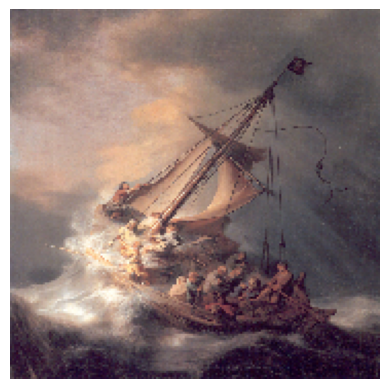

In [5]:
plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

Ik zal nu de naam van de veschillende lagen in het ResNet50 model ophalen, zodat ik deze kan aanroepen om de tussentijdse activaties van een specifieke laag op te vragen.

In [28]:
model = keras.applications.ResNet50(
 weights="imagenet",
 include_top=False)

for layer in model.layers: # naam van iedere laag printen
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        print(layer.name)

conv1_conv
conv2_block1_1_conv
conv2_block1_2_conv
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block2_1_conv
conv2_block2_2_conv
conv2_block2_3_conv
conv2_block3_1_conv
conv2_block3_2_conv
conv2_block3_3_conv
conv3_block1_1_conv
conv3_block1_2_conv
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block2_1_conv
conv3_block2_2_conv
conv3_block2_3_conv
conv3_block3_1_conv
conv3_block3_2_conv
conv3_block3_3_conv
conv3_block4_1_conv
conv3_block4_2_conv
conv3_block4_3_conv
conv4_block1_1_conv
conv4_block1_2_conv
conv4_block1_0_conv
conv4_block1_3_conv
conv4_block2_1_conv
conv4_block2_2_conv
conv4_block2_3_conv
conv4_block3_1_conv
conv4_block3_2_conv
conv4_block3_3_conv
conv4_block4_1_conv
conv4_block4_2_conv
conv4_block4_3_conv
conv4_block5_1_conv
conv4_block5_2_conv
conv4_block5_3_conv
conv4_block6_1_conv
conv4_block6_2_conv
conv4_block6_3_conv
conv5_block1_1_conv
conv5_block1_2_conv
conv5_block1_0_conv
conv5_block1_3_conv
conv5_block2_1_conv
conv5_block2_2_conv
conv5_block2_3_conv
conv5_blo

In [65]:
layer_outputs = []
layer_names = []

model = keras.models.load_model("4. Eigen Modellen/4.2 CNN met transfer learning/ResNet_data_augmentation_retrainable_convbase.keras")

for layer in model.layers:
    if "conv5_block3_2_conv" in layer.name:
        print(layer.name)
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)

activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)
print(activations)
# first_layer_activation = activations[0]
# print(first_layer_activation.ndim)
# plt.matshow(first_layer_activation[:, :], cmap="viridis")

1/1 [==============================] - 0s 30ms/step
[]


Jammer genoeg kan ik blijkbaar niet meteen de methode uit het boek volgen om de activaties van het ResNet model te tonen. Deze methode werkt wel wanneer ik deze uitprobeer op een van de convnets die ik zelf geschreven heb.

1/1 [==============================] - 0s 69ms/step


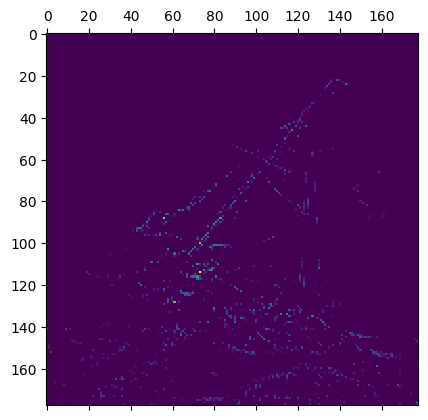

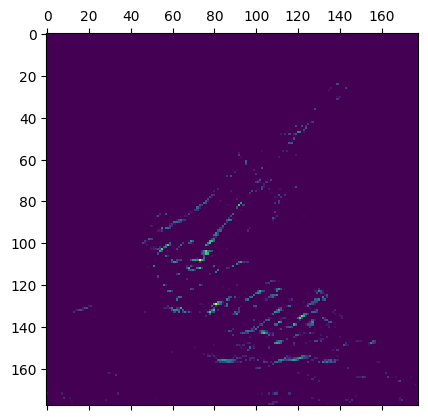

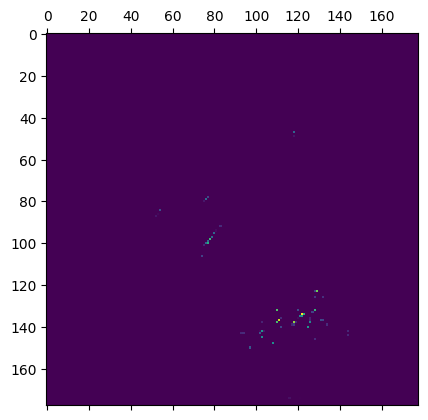

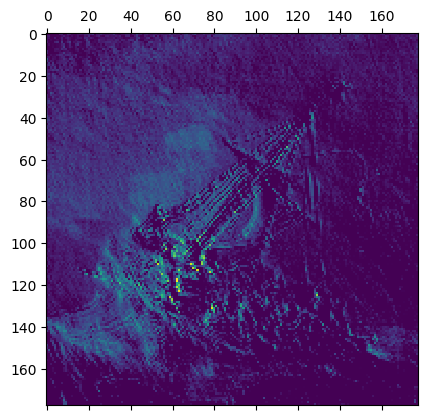

In [86]:
layer_outputs = []
layer_names = []

model = keras.models.load_model(
    "4. Eigen Modellen/4.1 Eigen Convolutioneel Netwerk/eigen_CNN.keras")

# functie om tussentijdse activaties af te drukken van een gegeven model op een gegeven image tensor
def show_activation(model, img_tensor):
    for layer in model.layers:
        if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
            layer_outputs.append(layer.output)
            layer_names.append(layer.name)

    activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img_tensor)

    first_layer_activation = activations[0]

    for i in range(1, 5):
        plt.matshow(first_layer_activation[0, :, :, i], cmap="viridis")


show_activation(model, img_tensor)

Hierboven kunt u zien een inzicht krijgen naar hoe het model de image bekijkt. Het is jammer dat dit niet mogelijk blijkt te zijn voor ResNet. Ik heb het op meerdere verschillende manieren toch proberen te bekomen, maar dit was tevergeefs. Toch hebben we een interessant beeld gekregen van hoe een model omgaat met dit specifieke probleem om images te classificeren.

Maar aangezien dit toch niet het model is die ik als finale model heb gekozen, en de resulaten ook niet echt naar verwachting zijn, lijk het me niet echt interessant om hierin verder een inzicht te krijgen.
